In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
df = pd.read_csv("diabetes.csv")

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [42]:
df= df.drop_duplicates()

In [43]:
cols = [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols] = df[cols].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [45]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Outcome'] = df['Outcome'].fillna(df['Outcome'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())

In [46]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [48]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [49]:
def gd(x,y):
    x = np.insert(x,0,1,axis = 1)
    weights  = np.ones(x.shape[1])
    lr = 0.5
    for i in range(5000):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr*(np.dot((y - y_hat),x)/x.shape[0])
    return weights[1:],weights[0]

In [50]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
coef_, intercept_ = gd(X_train_scaled, y_train)


In [54]:
def predict(X, coef, intercept):
    z = np.dot(X, coef) + intercept
    probs = sigmoid(z)
    return (probs >= 0.5).astype(int)


In [55]:
from sklearn.metrics import accuracy_score

y_pred = predict(X_test_scaled, coef_, intercept_)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.7532467532467533

In [58]:

new_data = pd.DataFrame([[2, 130, 70, 25, 90, 28.5, 0.45, 29]], 
                        columns=X_train.columns)
sample_scaled = scaler.transform(new_data)
prediction = predict(sample_scaled, coef_, intercept_)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")


Prediction: Non-Diabetic


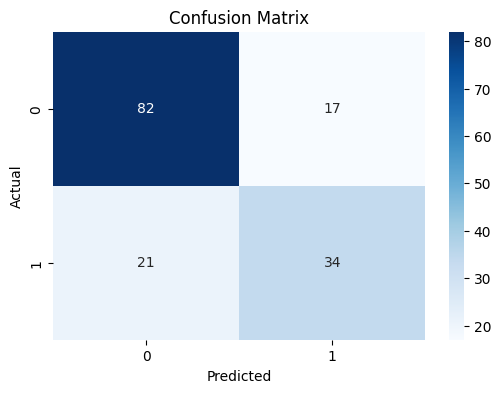

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()